In [35]:
import pandas as pd 
import numpy as np 
import random

In [36]:
def is_valid_solution(x,y,z):
    if (x+y+z == 10 and x>0 and y> 0 and z>0):
        return True
    else:
        return False

In [37]:
def mutaion_function(child_gene):
    
    random_number = random.randint(1 ,20)
    if(random_number == 1):
        # print("Mutation occured !!")
        random_bit = random.randint(1 , len(child_gene))
        child_gene = list(child_gene)
        random_bit = random.randint(0 , len(child_gene)-1)
        if(child_gene[random_bit] == "0"):
            child_gene[random_bit] = "1"
        else:
            child_gene[random_bit] ="0"
        return(''.join(map(str , child_gene)))  
    else:
        return(child_gene)  

In [38]:
def objective_function(x , y , z):
    if (x+y+z == 10 and x>0 and y>0 and z>0):
        
        return (x*20000 + y*15000 + z*17000)
 
    else:
       
        return 0

In [39]:

def fitness(parents_dataframe):

    fitness_total = sum(parents_dataframe.apply(lambda x: objective_function(x['x'],x['y'],x['z']) , axis=1))
    parents_dataframe["fitness"] = parents_dataframe.apply(lambda x : 1/(objective_function(x['x'],x['y'],x['z'])/fitness_total) if (objective_function(x['x'],x['y'],x['z']) > 0) else 0 , axis=1)
  
    parents_dataframe = parents_dataframe[parents_dataframe["fitness"]>0]
    parents_dataframe  = parents_dataframe.sort_values(by=['fitness'] , ascending=False)
    return (parents_dataframe.reset_index(drop=True))

In [40]:
def generate_population():
    
    number_of_parents = 4
    generation =[]
    while (len(generation) < number_of_parents):
        x =(random.randint(1,9))
        y =(random.randint(1,9))
        z =(random.randint(1,9))
        if (is_valid_solution(x , y , z)):
            temp = {
                'x':x,
                'y':y ,
                'z':z
            }
            generation.append(temp)
    
    df = pd.DataFrame(generation)
   
    return df

In [41]:
def convert_to_binary(x):
    return (bin(x)[2:].zfill(4))

def encoding_function(parents_dataframe):
    
    temp_dataframe = parents_dataframe.drop(['fitness' , 'generation'],axis=1)
    column_list = temp_dataframe.columns
    for columns in column_list:
        temp_dataframe[columns]  = temp_dataframe[columns].apply(lambda x : convert_to_binary(x))
    
    return(temp_dataframe)

def decoding_function(x):
    return int(x ,2)
    

In [42]:
def bit_swap_function(parent_column):
    elite_parent_counter = 0 
    parent_counter = 1
    child_list =[]
    while(elite_parent_counter <= len(parent_column)-1):
        elite_parent = parent_column[elite_parent_counter]
        
        for parent in parent_column[parent_counter:]:
            child_one = list(elite_parent)
            child_two = list(parent)
            gene_one = elite_parent[1:3]
            gene_two = parent[1:3]
            child_one[1:3] = gene_two
            child_two[1:3] = gene_one
            child_one = ''.join(map(str , child_one))
            child_two =''.join(map(str , child_two))
            child_one =(mutaion_function(child_one))
            child_two=(mutaion_function(child_two))
            child_list.append(child_one)
            child_list.append(child_two)  
        elite_parent_counter = elite_parent_counter + 1
        parent_counter = parent_counter + 1 
            
   
    # print("child_list --->",child_list)
    return child_list
    

def cross_over_function(parent_dataframe):
    encoded_dataframe = encoding_function(parent_dataframe)
    encoded_dataframe_new = pd.DataFrame()
    for column in encoded_dataframe.columns:
        encoded_dataframe_new[column] = bit_swap_function(list(encoded_dataframe[column]))
    # the rows are arranged in order of the fitness , the top row has the highest fitness
    return encoded_dataframe_new.applymap(decoding_function)

In [43]:
def elite_children(generation):
    
    generation_number = generation['generation'].max()
    temp_df = generation[generation['generation'] != generation_number]
    elite_generation = generation.drop(columns="generation")
    elite_generation.drop_duplicates(inplace=True)
    
    if(len(elite_generation) < 4):
        elite_generation['generation'] = generation_number
        elite_generation = pd.concat([temp_df , elite_generation] ,axis=0)
        elite_generation.sort_values(by='fitness' , ascending=False , inplace=True)
        return elite_generation
        
    else:
        elite_generation = elite_generation.head(4)
        elite_generation['generation'] = generation_number
        elite_generation = pd.concat([temp_df , elite_generation] ,axis=0)
        elite_generation.sort_values(by='fitness' ,ascending=False, inplace=True)
        return elite_generation

In [44]:
generation_list = [None]*40
generation_list[0] = (fitness(generate_population()))
generation_list[0]['generation'] =1


In [45]:
for i in range(1, len(generation_list)):
    generation_list[i] = cross_over_function(generation_list[i-1])
    
    (generation_list[i]).drop_duplicates(inplace=True)
    generation_list[i]['generation'] =i+1
    generation_list[i]['fitness']=''
    generation_list[i]=pd.concat([generation_list[i-1] ,generation_list[i]] , axis=0)
    generation_list[i] = fitness(generation_list[i])
    generation_list[i] = elite_children(generation_list[i])

output = generation_list[len(generation_list)-1]  

In [46]:
generation_names =output['generation'].unique()
generation_names
fitness_table = pd.DataFrame({'generation': [], 'fitness_score': []})

for i in generation_names:
    mean_fitness = output[output['generation']==i]['fitness'].mean()
    fitness_table.loc[len(fitness_table)] = [i, mean_fitness]
    
fitness_table.sort_values(by="generation" ,inplace=True)
fitness_table['fitness_score_pct_change'] = fitness_table['fitness_score'].pct_change()


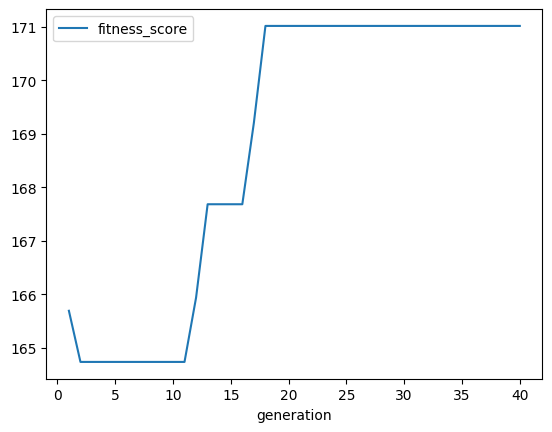

In [47]:
import matplotlib.pyplot as plt

fitness_table.plot(x='generation', y='fitness_score', kind='line')
plt.show()

In [48]:
print(f"{round(fitness_table['fitness_score_pct_change'].sum()*100 ,2)}%")

3.18%


In [ ]:
import numpy as np 
def sig(x):
 return 1/(1 + np.exp(-x))

In [ ]:
fitness_table['']